<a href="https://colab.research.google.com/github/matthewtech-o/HAMOYE-INTERNSHIP/blob/main/Optuna_Premier_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries for working with dataframes and numerical data
import pandas as pd
import numpy as np

In [2]:
#reading in the dataset
ev_data = pd.read_csv('ElectricCarData.csv')
ev_data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Mercedes,EQS 580 4MATIC,4.3,210,610,177,800,Yes,AWD,Type 2 CCS,Sedan,F,5,115000
1,Kia,EV6 GT,3.5,260,395,196,920,Yes,AWD,Type 2 CCS,SUV,C,5,58295
2,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
3,Skoda,Enyaq iV 80,8.6,160,420,183,510,Yes,RWD,Type 2 CCS,SUV,C,5,39350
4,Tesla,Model 3 Standard Range Plus,5.6,225,340,147,680,Yes,RWD,Type 2 CCS,Sedan,D,5,40990


In [3]:
#checking information about the dataset
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            174 non-null    object 
 1   Model            174 non-null    object 
 2   AccelSec         174 non-null    float64
 3   TopSpeed_KmH     174 non-null    int64  
 4   Range_Km         174 non-null    int64  
 5   Efficiency_WhKm  174 non-null    int64  
 6   FastCharge_KmH   174 non-null    object 
 7   RapidCharge      174 non-null    object 
 8   PowerTrain       174 non-null    object 
 9   PlugType         174 non-null    object 
 10  BodyStyle        174 non-null    object 
 11  Segment          174 non-null    object 
 12  Seats            174 non-null    int64  
 13  PriceEuro        174 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 19.2+ KB


In [4]:
ev_data.drop_duplicates()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Mercedes,EQS 580 4MATIC,4.3,210,610,177,800,Yes,AWD,Type 2 CCS,Sedan,F,5,115000
1,Kia,EV6 GT,3.5,260,395,196,920,Yes,AWD,Type 2 CCS,SUV,C,5,58295
2,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
3,Skoda,Enyaq iV 80,8.6,160,420,183,510,Yes,RWD,Type 2 CCS,SUV,C,5,39350
4,Tesla,Model 3 Standard Range Plus,5.6,225,340,147,680,Yes,RWD,Type 2 CCS,Sedan,D,5,40990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
170,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
171,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
172,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [5]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            174 non-null    object 
 1   Model            174 non-null    object 
 2   AccelSec         174 non-null    float64
 3   TopSpeed_KmH     174 non-null    int64  
 4   Range_Km         174 non-null    int64  
 5   Efficiency_WhKm  174 non-null    int64  
 6   FastCharge_KmH   174 non-null    object 
 7   RapidCharge      174 non-null    object 
 8   PowerTrain       174 non-null    object 
 9   PlugType         174 non-null    object 
 10  BodyStyle        174 non-null    object 
 11  Segment          174 non-null    object 
 12  Seats            174 non-null    int64  
 13  PriceEuro        174 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 19.2+ KB


We can see that we have 14 columns and 174 rows. It shows that we do not have null values as every column has 174 enteries.

# EXPLORATORY DATA ANALYSIS

In [6]:
#using a describe function to give a summary statistics of the numerical inputs
ev_data.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,7.282759,180.649425,354.080460,185.563218,4.902299,53926.442529
std,2.828620,44.776750,129.905543,27.410897,0.694067,33046.041033
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.200000,150.000000,270.000000,167.250000,5.000000,33033.250000
50%,7.300000,165.000000,352.500000,180.000000,5.000000,43247.500000
75%,8.975000,200.000000,410.000000,196.000000,5.000000,60559.250000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


These shows us that we do not have wrong values like negative values. We cannot assume there are outliers for now, because every model has its own specification that we cannot presume is wrong until further analysis

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
fig = px.histogram(ev_data, 
                   x='AccelSec', 
                   marginal='box', 
                   nbins=21, 
                   title='Distribution of Acceleration')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of acceleration in the dataset is almost uniform, with very little outlier like one entry with accleration between 22-22.9

In [10]:
fig = px.histogram(ev_data, 
                   x='TopSpeed_KmH', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of Top Speed(KmH)')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(ev_data, 
                   x='Range_Km', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of Range(Km)')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(ev_data, 
                   x='Efficiency_WhKm', 
                   marginal='box', 
                   color_discrete_sequence=['green'], 
                   title='Distribution of Efficiency(WhKm)')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
ev_data.Brand.nunique()

53

In [14]:
fig = px.histogram(ev_data, 
                   x='PriceEuro', 
                   marginal='box', 
                   title='Prices')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.scatter(ev_data, 
                 x='Brand', 
                 y='PriceEuro', 
                 color='RapidCharge', 
                 opacity=0.8, 
                 hover_data=['Seats'], 
                 title='Brand vs. Prices')
fig.update_traces(marker_size=5)
fig.show()


## Which car has the fastest 0-100 acceleration?

In [20]:
accel_dt = ev_data.sort_values('AccelSec')
accel_dt.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
122,Tesla,Roadster,2.1,410,970,206,920,Yes,AWD,Type 2 CCS,Cabriolet,S,4,215000
69,Tesla,Roadster,2.1,410,970,206,920,Yes,AWD,Type 2 CCS,Cabriolet,S,4,189000
24,Tesla,Model S Plaid,2.1,322,535,168,800,Yes,AWD,Type 2 CCS,Sedan,F,5,118980
130,Tesla,Model S Performance,2.5,261,505,188,550,Yes,AWD,Type 2,Liftback,F,5,96990
87,Porsche,Taycan Turbo S,2.8,260,375,223,780,Yes,AWD,Type 2 CCS,Sedan,F,4,180781


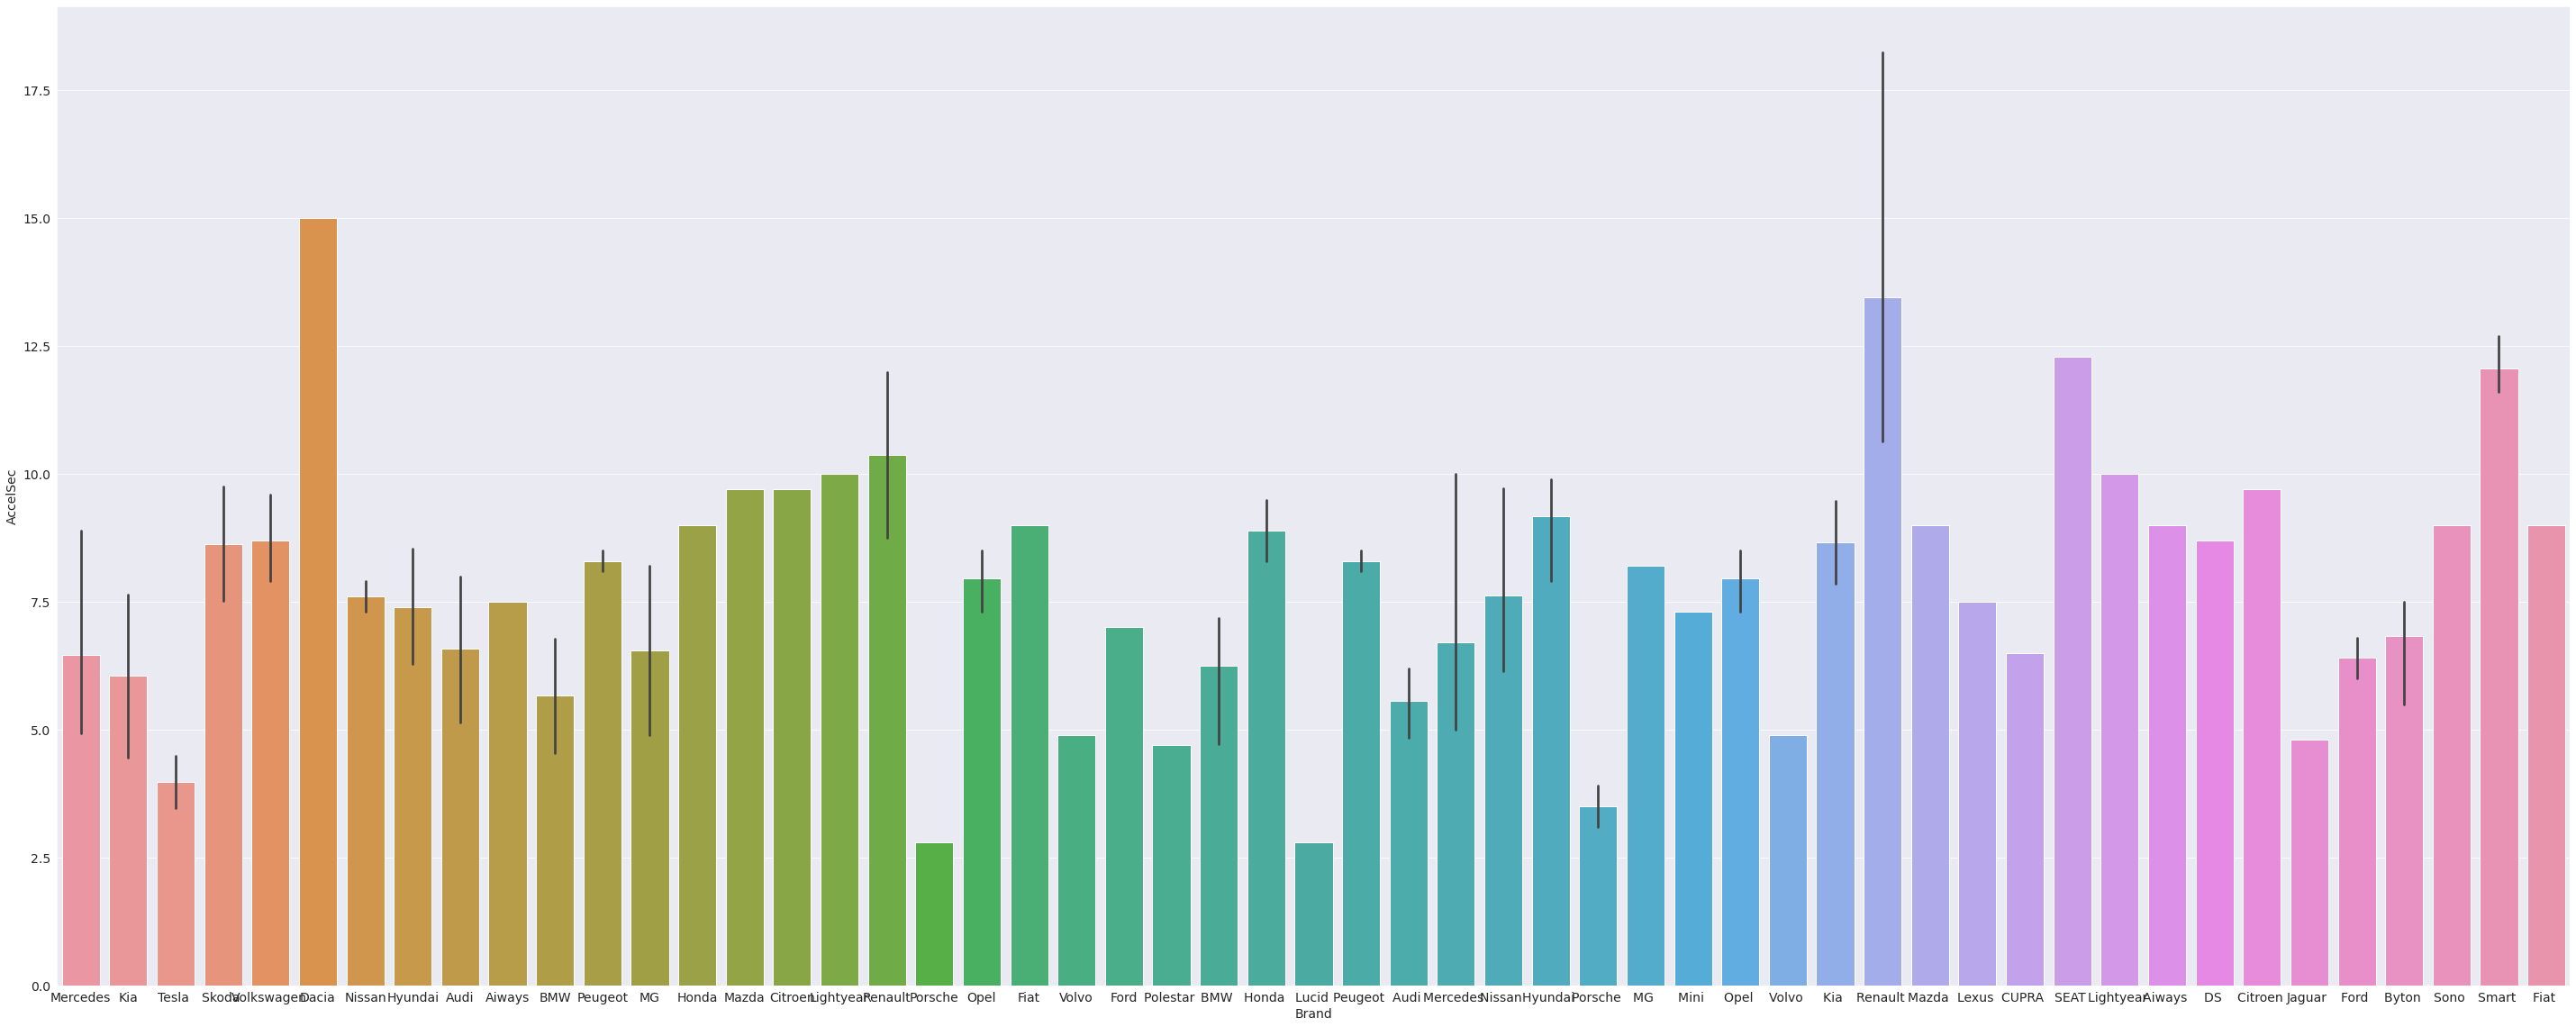

In [21]:
plt.figure(figsize=(50,20))
ax2=sns.barplot(x = 'Brand',
            y = 'AccelSec',
            data = ev_data)

Which vehicle has the highest efficiency?

In [22]:
efficiency_dt = ev_data.sort_values('Efficiency_WhKm')
efficiency_dt.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
34,Lightyear,One,10.0,150,575,104,540,Yes,AWD,Type 2 CCS,Sedan,F,5,150000
119,Lightyear,One,10.0,150,575,104,540,Yes,AWD,Type 2 CCS,Liftback,F,5,149000
4,Tesla,Model 3 Standard Range Plus,5.6,225,340,147,680,Yes,RWD,Type 2 CCS,Sedan,D,5,40990
57,Fiat,500e Hatchback 42 kWh,9.0,150,250,149,420,Yes,FWD,Type 2 CCS,Hatchback,B,4,23995
7,Tesla,Model 3 Standard Range Plus LFP,5.6,225,340,150,570,Yes,RWD,Type 2 CCS,Sedan,D,5,40990


In [26]:
efficiency_dt[efficiency_dt['Efficiency_WhKm'] == 104]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
34,Lightyear,One,10.0,150,575,104,540,Yes,AWD,Type 2 CCS,Sedan,F,5,150000
119,Lightyear,One,10.0,150,575,104,540,Yes,AWD,Type 2 CCS,Liftback,F,5,149000


Does A Difference in Power Train Effect the Range, Top Speed, and Efficiency?

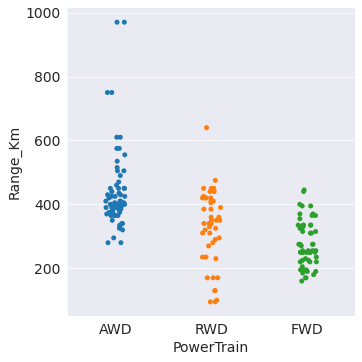

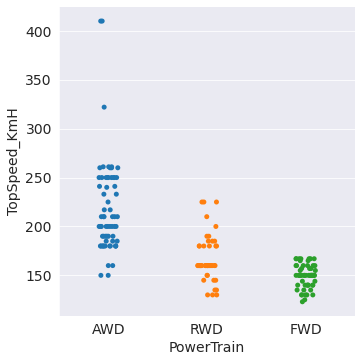

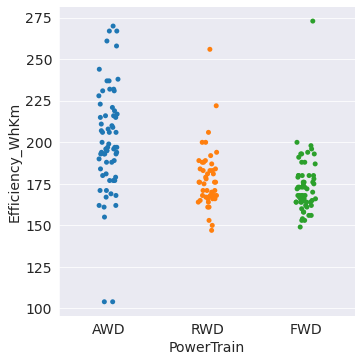

In [27]:
fig, axs = plt.subplots(1,2)
sns.catplot(x="PowerTrain", y="Range_Km", data=ev_data)
sns.catplot(x="PowerTrain", y="TopSpeed_KmH", data=ev_data)
sns.catplot(x="PowerTrain", y="Efficiency_WhKm", data=ev_data)
plt.close(1)

Which manufacturer has the most number of vehicle

In [28]:
(ev_data[["Brand","Model"]].describe())

,Brand,Model
count,174,174
unique,53,147
top,Tesla,Kona Electric 64 kWh
freq,23,3


How does price relate to rapid charging?

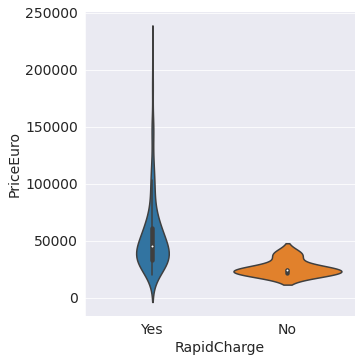

In [29]:
ax2 = sns.catplot(x="RapidCharge", y="PriceEuro", data = ev_data, kind="violin")

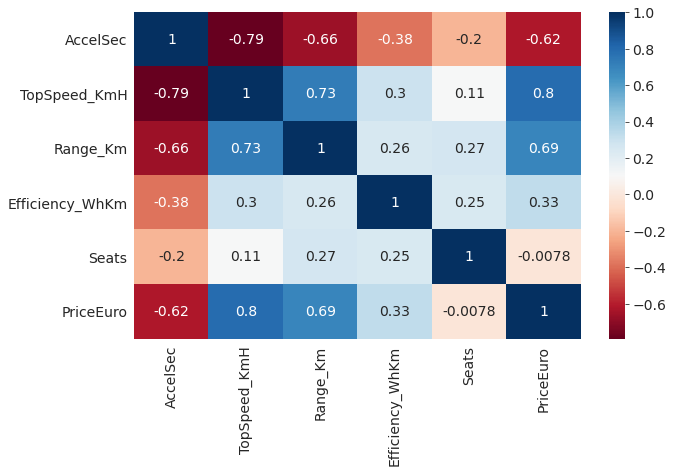

In [30]:
sns.heatmap(ev_data.corr(), annot=True, cmap="RdBu")
plt.show()

In [31]:
ev_data.corr()['PriceEuro']

AccelSec          -0.616466
TopSpeed_KmH       0.796531
Range_Km           0.693040
Efficiency_WhKm    0.332372
Seats             -0.007829
PriceEuro          1.000000
Name: PriceEuro, dtype: float64

In [33]:
# Separating target variable and its features
y = ev_data['PriceEuro']
X = ev_data.drop('PriceEuro',axis=1)

In [34]:
y.head()

0    115000
1     58295
2     55480
3     39350
4     40990
Name: PriceEuro, dtype: int64

In [36]:
X.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats
0,Mercedes,EQS 580 4MATIC,4.3,210,610,177,800,Yes,AWD,Type 2 CCS,Sedan,F,5
1,Kia,EV6 GT,3.5,260,395,196,920,Yes,AWD,Type 2 CCS,SUV,C,5
2,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5
3,Skoda,Enyaq iV 80,8.6,160,420,183,510,Yes,RWD,Type 2 CCS,SUV,C,5
4,Tesla,Model 3 Standard Range Plus,5.6,225,340,147,680,Yes,RWD,Type 2 CCS,Sedan,D,5


In [37]:
from sklearn.model_selection import train_test_split

In [51]:
train_val_df, test_df = train_test_split(ev_data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)
print(train_val_df.shape)
print(test_df.shape)
print(train_df.shape)
print(val_df.shape)

(139, 14)
(35, 14)
(104, 14)
(35, 14)


In [53]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'PriceEuro'

In [54]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [55]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [56]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [57]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [58]:
train_inputs[numeric_cols].describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats
count,104.00000,104.000000,104.000000,104.000000,104.000000
mean,6.83750,186.057692,367.692308,183.961538,4.932692
std,2.55024,44.029960,124.084850,26.142969,0.714135
min,2.10000,130.000000,95.000000,104.000000,2.000000
25%,4.90000,155.250000,287.500000,167.000000,5.000000
50%,7.00000,180.000000,370.000000,179.500000,5.000000
75%,8.50000,210.000000,425.000000,196.250000,5.000000
max,12.60000,410.000000,970.000000,267.000000,7.000000


In [59]:
train_inputs[categorical_cols].nunique()

Model             95
FastCharge_KmH    60
RapidCharge        2
PowerTrain         3
PlugType           4
BodyStyle          8
Segment            8
dtype: int64

In [60]:
ev_data[numeric_cols].isna().sum()

AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
Seats              0
dtype: int64

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(ev_data[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [64]:
ev_data[categorical_cols].nunique()

Model             147
FastCharge_KmH     70
RapidCharge         2
PowerTrain          3
PlugType            5
BodyStyle          10
Segment             8
dtype: int64

In [66]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(ev_data[categorical_cols])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [67]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Model_2', 'Model_3 Crossback E-Tense', 'Model_500e Convertible', 'Model_500e Hatchback', 'Model_500e Hatchback 42 kWh', 'Model_Air ', 'Model_Ampera-e', 'Model_Ampera-e ', 'Model_Ariya 63kWh', 'Model_Ariya 87kWh', 'Model_Ariya e-4ORCE 63kWh', 'Model_Ariya e-4ORCE 87kWh', 'Model_Ariya e-4ORCE 87kWh Performance', 'Model_CITIGOe iV ', 'Model_Cooper SE ', 'Model_Corsa-e', 'Model_Corsa-e ', 'Model_Cybertruck Dual Motor', 'Model_Cybertruck Single Motor', 'Model_Cybertruck Tri Motor', 'Model_EQ forfour ', 'Model_EQ fortwo cabrio', 'Model_EQ fortwo coupe', 'Model_EQA ', 'Model_EQA 250', 'Model_EQC 400 4MATIC', 'Model_EQS 450+', 'Model_EQS 580 4MATIC', 'Model_EQV 300 Long', 'Model_EV6 GT', 'Model_EV6 Long Range 2WD', 'Model_EV6 Long Range AWD', 'Model_Enyaq iV 50', 'Model_Enyaq iV 60', 'Model_Enyaq iV 80', 'Model_Enyaq iV 80X', 'Model_Enyaq iV RS', 'Model_Enyaq iV vRS', 'Model_I-Pace ', 'Model_ID.3 1st', 'Model_ID.3 Pro', 'Model_ID.3 Pro Performance', 'Model_ID.3 Pro S', 'Model_ID.3 Pure Perfo

In [68]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [70]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [52]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [71]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train, train_targets)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(train_targets,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of validation set
    y_pred_test = model.predict(X_val)
    R2_test_model = r2_score(val_targets,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,train_targets ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((train_targets-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = val_targets, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 1.0
Test R2-score : -3.570596180703382e+18
Train CV scores : [ 6.13782680e-01 -2.87969230e+22 -1.23044764e+21 -1.03533190e+22
 -8.24531554e+20]
Train CV mean : -8.24104425074935e+21


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



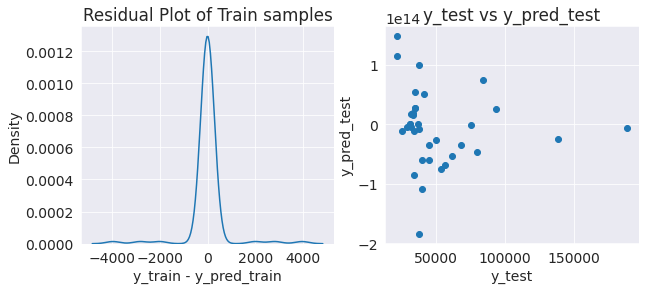

In [72]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 1.0
Test R2-score : 0.77
Train CV scores : [0.61386787 0.88131741 0.83115953 0.83519529 0.65966001]
Train CV mean : 0.76


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



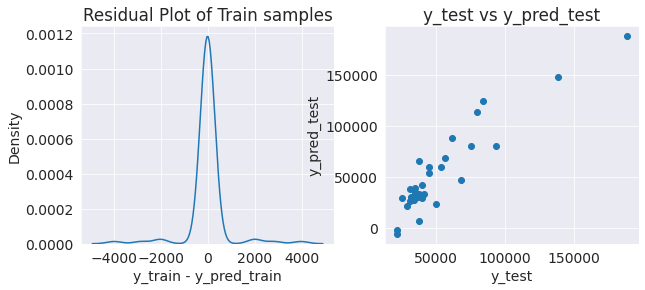

In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

In [74]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 31110826.554532994, tolerance: 11273646.99642651

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 26894592.00751456, tolerance: 11901002.215679519

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 23146709.44822751, tolerance: 10848852.608889285

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 31588140.87511422, tolerance: 7712432.

Train R2-score : 0.97
Test R2-score : 0.64
Train CV scores : [0.54450377 0.82696914 0.83549901 0.80696718 0.66959452]
Train CV mean : 0.74


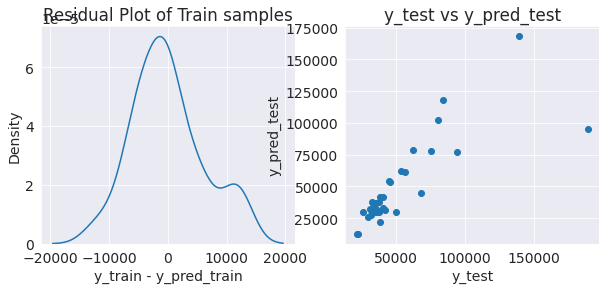

In [75]:
car_pred_model(ls_rs,"lasso.pkl")

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.87
Test R2-score : 0.78
Train CV scores : [0.5411062  0.84315845 0.83739617 0.73540723 0.84924623]
Train CV mean : 0.76


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



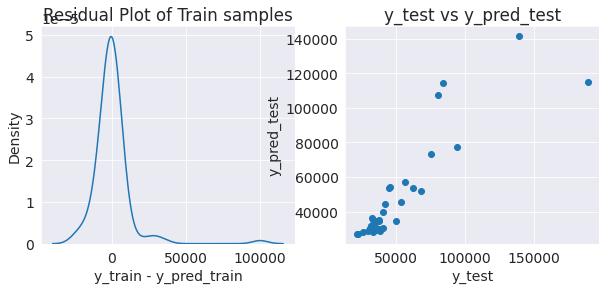

In [77]:
car_pred_model(rf_rs,'random_forest.pkl')

In [78]:
print(rf_rs.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.94
Train CV scores : [0.54940787 0.73345714 0.8200542  0.91568869 0.77115617]
Train CV mean : 0.76


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



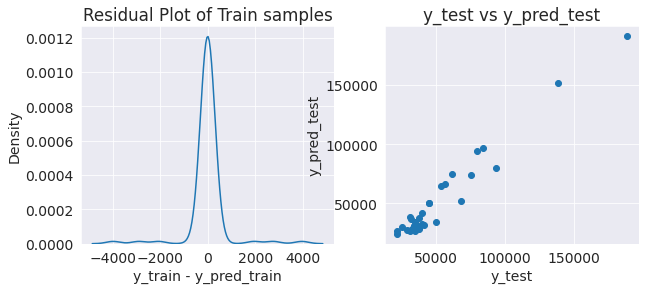

In [80]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [81]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,1.00,-3.570596e+18,-8.241044e+21
1,Ridge,1.00,7.700000e-01,7.600000e-01
2,Lasso,0.97,6.400000e-01,7.400000e-01
3,RandomForestRegressor,0.87,7.800000e-01,7.600000e-01
4,GradientBoostingRegressor,1.00,9.400000e-01,7.600000e-01
